# Satellite data : CT (Cloud Type)

The aim of this notebook is to show how to read the Cloud Type (CT) satellite data from a data sample.

You will find one NetCDF file per geographic zone ('NW' for North-West of France and 'SE' for South-East of France) and per year. 

For each pixel, the value represents a category of cloud type (16 classes in total):
* 0:No data
* 1:Cloud-free land
* 2:Cloud-free sea
* 3:Snow over land
* 4:Sea ice
* 5:Very low clouds
* 6:Low clouds
* ...

The spatial resolution is 0.03° and the time step is 15 minutes but some dates can be missing (due to problems in original data, so we can do anything).

For more information, cf [documentation](https://meteofrance.github.io/meteonet/english/data/satellite/).

In [1]:
from meteonet_toolbox.constant import CLOUD_TYPE_16,CT_16_COLOR_MAP
import xarray as xr
import datetime
%matplotlib notebook
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib import colors

## Parameters definition

Select the area and year you want to study:

In [2]:
zone = 'NW'
year = '2016'

## Loading data using parameters

In [3]:
fname = "../../data_samples/satellite/CT_%s_%s.nc" % (zone,year) #it is about a data sample : a few days in 2016 in NW zone
data = xr.open_dataset(fname)

## Quick field visualisation 

The following command shows the CT data on a given zone at different dates (dates indexes : 0,3,5 and 7).

<IPython.core.display.Javascript object>


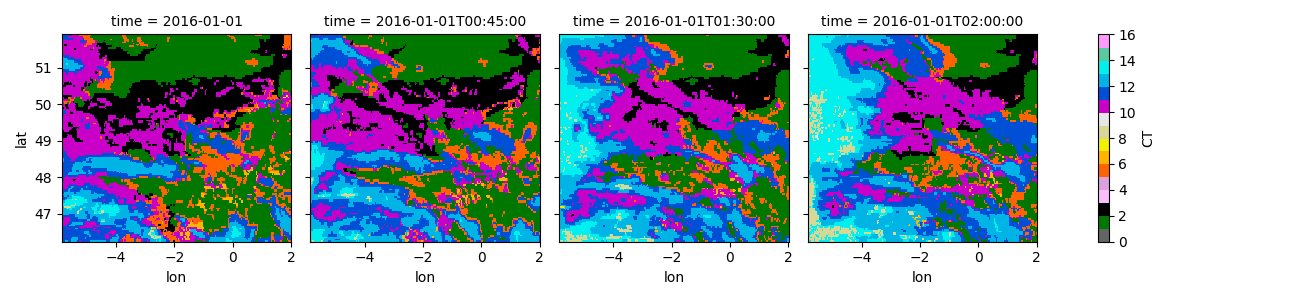

/opt/anaconda3/envs/preproc/lib/python3.7/site-packages/xarray/plot/plot.py:970: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  primitive = ax.pcolormesh(x, y, z, **kwargs)


In [4]:
nbClasses = 16
color = CT_16_COLOR_MAP
legend = CLOUD_TYPE_16
cmap = colors.ListedColormap(color)
norm = colors.BoundaryNorm([i for i in range(nbClasses+1)], cmap.N)

patches = [mpatches.Patch(color=color[i], label=legend[str(i)]) for i in range(nbClasses)]

data.isel(time=[0,3,5,7])['CT'].plot(x='lon', y='lat',col='time',cmap=cmap, norm=norm)
plt.show()

## Exploration of metadata

Overview of the data:

In [ ]:
data

Get the information about coordinates (latitude and longitude). It is in degrees (north degrees about latitude and east degrees about longitude).

In [ ]:
coord = 'lon'
data[coord]

In [ ]:
data[coord].values

Get the information about the observation times:

In [ ]:
dates = data['time']
dates

Get the information about the CT data:

In [ ]:
d = data['CT']
d_vals = d.values  #get the values 
d

The structure of the data (3 dimensions):
* number of observation times
* number of points in latitude 
* number of points in longitude

In [ ]:
d_vals.shape

## Plotting data with Cartopy

Plot the data for one given date with Cartopy:

In [ ]:
from meteonet_toolbox.constant import DOMAINS
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [ ]:
#studied date
studied_date = '201601010215'
date = datetime.datetime.strptime(studied_date,'%Y%m%d%H%M')

In [ ]:
#coordinates of study zone boundaries
lllat=DOMAINS[zone]['lry']    #lower left latitude
urlat=DOMAINS[zone]['uly']    #upper right latitude
lllon=DOMAINS[zone]['ulx']    #lower left longitude
urlon=DOMAINS[zone]['lrx']    #upper right longitude
extent = [lllon, urlon, lllat, urlat]

In [ ]:
fig = plt.figure(figsize=(8,9))

# Select projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the data
img = plt.imshow(data.sel(time=date)['CT'], interpolation='none', origin='upper',cmap=cmap, norm=norm, extent=extent)

# Add coastlines and borders
ax.coastlines(resolution='50m', linewidth=1)
ax.add_feature(cfeature.BORDERS.with_scale('50m'))

# Show only the area we defined
ax.set_extent(extent)

plt.colorbar(img, orientation= 'horizontal', pad=0.03).set_label('Cloud Type (CT)')
#plt.legend(handles=patches,loc='lower center')
plt.legend(handles=patches, loc='lower center',ncol=2,bbox_to_anchor=(0.12, -0.5, 0.8, 0.4),fontsize = 'x-small')
plt.title('CT data - '+ zone + ' zone - '+ studied_date)
plt.show()